In [1]:
import pandas as pd

In [2]:
file = pd.read_csv(r"D:\data sets\Datasets\movie_data\movies.csv")
df = pd.DataFrame(file)
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df.shape

(9742, 3)

In [4]:
file = pd.read_csv(r"D:\data sets\Datasets\movie_data\ratings.csv")
df_rating = pd.DataFrame(file)
df_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_rating.shape

(100836, 4)

In [7]:
df_rating['userId'].nunique()

610

In [11]:
movie_rating_counts = df_rating['movieId'].value_counts()
max_rated_movie_id = movie_rating_counts.idxmax()
max_ratings_count = movie_rating_counts.max()
max_rated_movie_details = df[df['movieId'] == max_rated_movie_id]
print(f"Movie with the maximum number of ratings: {max_rated_movie_details['title'].values[0]}")
print(f"Number of ratings for this movie: {max_ratings_count}")
print(f"Genres of the movie: {max_rated_movie_details['genres'].values[0]}")

Movie with the maximum number of ratings: Forrest Gump (1994)
Number of ratings for this movie: 329
Genres of the movie: Comedy|Drama|Romance|War


In [12]:
file = pd.read_csv(r"D:\data sets\Datasets\movie_data\tags.csv")
tag_df = pd.DataFrame(file)
tag_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [13]:
movie_id = df[df['title'] == 'Matrix, The (1999)']['movieId'].values[0]
movie_tags = tag_df[tag_df['movieId'] == movie_id]
print("Tags for 'Matrix, The (1999) can be:")
print(movie_tags['tag'].tolist())

Tags for 'Matrix, The (1999) can be:
['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


In [14]:
movie_id = df[df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
movie_ratings = df_rating[df_rating['movieId'] == movie_id]
average_rating = movie_ratings['rating'].mean()
print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {average_rating:.2f}")

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.97


In [15]:
import matplotlib.pyplot as plt

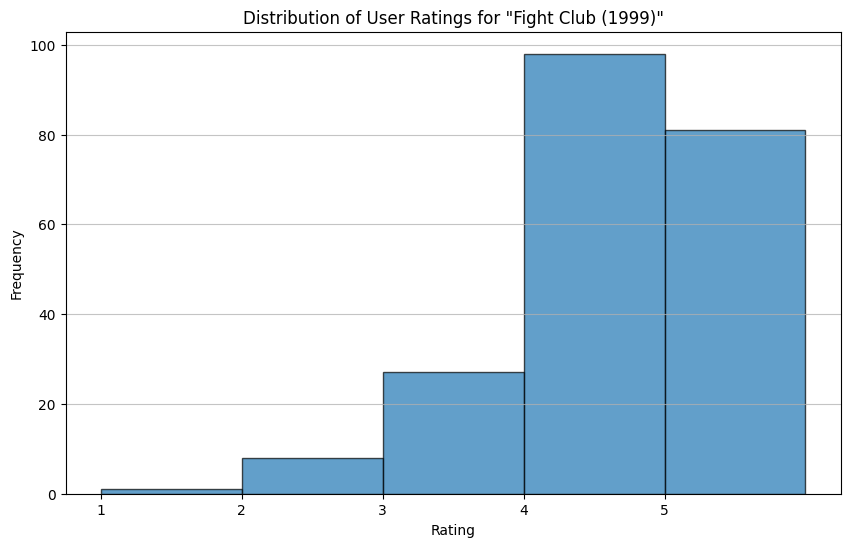

In [16]:
movie_id = df[df['title'] == 'Fight Club (1999)']['movieId'].values[0]
movie_ratings = df_rating[df_rating['movieId'] == movie_id]
plt.figure(figsize=(10, 6))
plt.hist(movie_ratings['rating'], bins=range(1, 7), edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xticks(range(1, 6))  # Assuming ratings are from 1 to 5
plt.grid(axis='y', alpha=0.75)
plt.show()

In [18]:
ratings_grouped = df_rating.groupby('movieId').agg(
    rating_count=('rating', 'size'),
    average_rating=('rating', 'mean')
).reset_index()
ratings_filtered = ratings_grouped[ratings_grouped['rating_count'] > 50]
movies_filtered_df = pd.merge(df, ratings_filtered, on='movieId')
movies_filtered_df.head()

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078
4,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [19]:
most_popular_movie = movies_filtered_df.loc[movies_filtered_df['average_rating'].idxmax()]
print(f"Most popular movie based on average user ratings:")
print(f"Title: {most_popular_movie['title']}")
print(f"Genres: {most_popular_movie['genres']}")
print(f"Average Rating: {most_popular_movie['average_rating']:.2f}")
print(f"Rating Count: {most_popular_movie['rating_count']}")

Most popular movie based on average user ratings:
Title: Shawshank Redemption, The (1994)
Genres: Crime|Drama
Average Rating: 4.43
Rating Count: 317


In [20]:
top_movies_by_ratings = movies_filtered_df.sort_values(by='rating_count', ascending=False).head(5)
print("Top 5 movies based on number of user ratings:")
print(top_movies_by_ratings[['title', 'rating_count']])

Top 5 movies based on number of user ratings:
                                title  rating_count
61                Forrest Gump (1994)           329
53   Shawshank Redemption, The (1994)           317
49                Pulp Fiction (1994)           307
99   Silence of the Lambs, The (1991)           279
248                Matrix, The (1999)           278


In [21]:
sci_fi_movies = movies_filtered_df[movies_filtered_df['genres'].str.contains('Sci-Fi')]
sci_fi_movies_sorted = sci_fi_movies.sort_values(by='rating_count', ascending=False)
third_most_popular_sci_fi = sci_fi_movies_sorted.iloc[2]
print("Third most popular Sci-Fi movie based on number of user ratings:")
print(f"Title: {third_most_popular_sci_fi['title']}")
print(f"Genres: {third_most_popular_sci_fi['genres']}")
print(f"Rating Count: {third_most_popular_sci_fi['rating_count']}")

Third most popular Sci-Fi movie based on number of user ratings:
Title: Jurassic Park (1993)
Genres: Action|Adventure|Sci-Fi|Thriller
Rating Count: 238


In [22]:
file = pd.read_csv(r"D:\data sets\Datasets\movie_data\links.csv")
link_df = pd.DataFrame(file)
link_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [23]:
movies_with_links_df = pd.merge(movies_filtered_df, link_df, on='movieId')

In [24]:
movies_with_links_df.head()

,movieId,title,genres,rating_count,average_rating,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0


In [32]:
import os

directory = 'D:\\data sets\\Datasets'
if not os.path.exists(directory):
    os.makedirs(directory)


In [39]:
directory = 'D:\\data sets\\Datasets'
file_path = os.path.join(directory, 'movie_data.csv')

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Convert DataFrame to CSV
try:
    movies_with_links_df.to_csv(file_path, index=False)
    print(f"DataFrame has been saved to {file_path}")
except PermissionError as e:
    print(f"PermissionError: {e}")

DataFrame has been saved to D:\data sets\Datasets\movie_data.csv


In [40]:
file = pd.read_csv(r"D:\data sets\Datasets\movie_data.csv")
movie_link_df = pd.DataFrame(file)
movie_link_df.head()

,movieId,title,genres,rating_count,average_rating,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0


In [82]:
import requests
from bs4 import BeautifulSoup
import numpy as np

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    try:
        response = requests.get(URL, headers=request_header)
        soup = BeautifulSoup(response.text, 'html.parser')
        imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
        return imdb_rating.text if imdb_rating else np.nan
    except Exception as e:
        print(f"Error fetching rating for IMDb ID {imdbId}: {e}")
        return np.nan


In [84]:
movie_link_df['IMDB Score'] = movie_link_df['imdbId'].apply(scrapper)

In [90]:
movie_link_Df.head()

,movieId,title,genres,rating_count,average_rating,imdbId,tmdbId,IMDB Score
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,6.9
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.2
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3


In [95]:
highest_imdb_movie = movie_link_Df.loc[movie_link_Df['IMDB Score'].idxmax()]

In [96]:
print("MovieId with the highest IMDB Score:", highest_imdb_movie['movieId'])

MovieId with the highest IMDB Score: 318


In [ ]:
sci_fi_df = movie_link_Df[movie_link_Df['genres'].str.contains('Sci-Fi')]